In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

# Regresja liniowa z usunięciem wartości odstających

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
news_data.shape

(39644, 61)

In [4]:
print("\nFirst artcile in database")
print(news_data.iloc[0,:])


First artcile in database
url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                     731
 n_tokens_title                                                                 12
 n_tokens_content                                                              219
 n_unique_tokens                                                          0.663594
                                                       ...                        
 title_subjectivity                                                            0.5
 title_sentiment_polarity                                                  -0.1875
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                               0.1875
 shares                                                                        593
Name: 0, Length: 61, dtype: object


In [5]:
#SPRAWDZENIE PUSTYCH WARTOŚCI
news_data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [6]:
#Sprawdzenie korelacji
corrmat = news_data.corr()
corrmat[' shares'].sort_values(ascending=False)


 shares                           1.000000
 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is

Text(0, 0.5, 'shares')

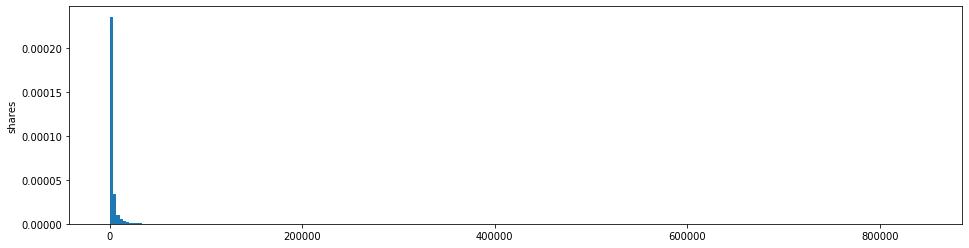

In [7]:
#Wartości odstające - Wykres

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16.0
fig_size[1] = 4.0

x = news_data[' shares']
plt.hist(x, density=True, bins=250)
plt.ylabel('shares')


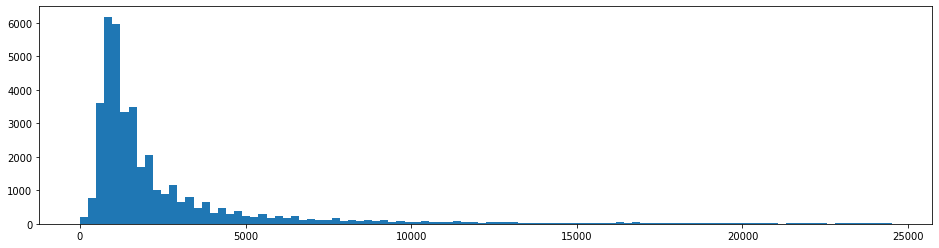

(39053, 1)

In [8]:
#Usuwanie wartości odstających

def reject_outliers(shares):
    u = np.median(news_data[' shares'])
    s = np.std(news_data[' shares'])
    filtered= [e for e in (news_data[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

news_data_shares = pd.DataFrame(filtered)
news_data_shares.shape

#Oryginalna liczba wierszy to 39644. Dzięki użyciu powyższej funkcji usunęliśmy 591 wartości odstających w podanym datasecie

In [9]:
#Tworzenie nowych danych bez wartości odstających.
#Definiujemy wartość odstającą jako wartość atrybutu „shares”, która jest poza dwoma standardowymi odchyleniami
#(= 3395 + (2 x 11627) = 26649)
fixedData = news_data[news_data[' shares']<26647]


In [10]:
#Korelacja w fixedData
corrmat = fixedData.corr()
corrmat[' shares'].sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.184027
 LDA_03                           0.122997
 kw_max_avg                       0.096294
 kw_min_avg                       0.081258
 num_hrefs                        0.076651
 num_imgs                         0.073403
 self_reference_avg_sharess       0.067889
 is_weekend                       0.067792
 self_reference_min_shares        0.060230
 self_reference_max_shares        0.055830
 kw_avg_max                       0.052563
 global_subjectivity              0.052508
 abs_title_sentiment_polarity     0.052128
 weekday_is_sunday                0.049506
 title_subjectivity               0.048917
 data_channel_is_socmed           0.047302
 num_keywords                     0.044302
 weekday_is_saturday              0.042820
 title_sentiment_polarity         0.037470
 num_videos                       0.036995
 kw_avg_min                       0.036717
 kw_max_min                       0.033022
 data_chann

In [11]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,2:-1]
target = fixedData.iloc[1:,-1]

data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [12]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [14]:
# STANDARYZACJA
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[3.33333333e-01, 3.00920463e-02, 8.62686278e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 2.48996932e-02, 8.20441556e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 6.26622610e-02, 7.18670296e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.80952381e-01, 5.21595468e-02, 7.36597916e-04, ...,
        5.68181818e-01, 9.09090909e-02, 1.36363636e-01],
       [1.90476190e-01, 8.04814727e-02, 7.69605268e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.80952381e-01, 1.85272599e-02, 1.00140763e-03, ...,
        6.25000000e-01, 3.33333333e-01, 2.50000000e-01]])

In [15]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 58)
target_train: (35216,)

Testing dataset:
data_test: (3913, 58)
target_test: (3913,)


In [16]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [18]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,821,1840.0
1,1500,1888.0
2,1500,1312.0
3,4400,3696.0
4,1700,3312.0
5,3000,2656.0
6,1100,1280.0
7,708,2176.0
8,1300,3408.0
9,733,3424.0


Wykres predykcji


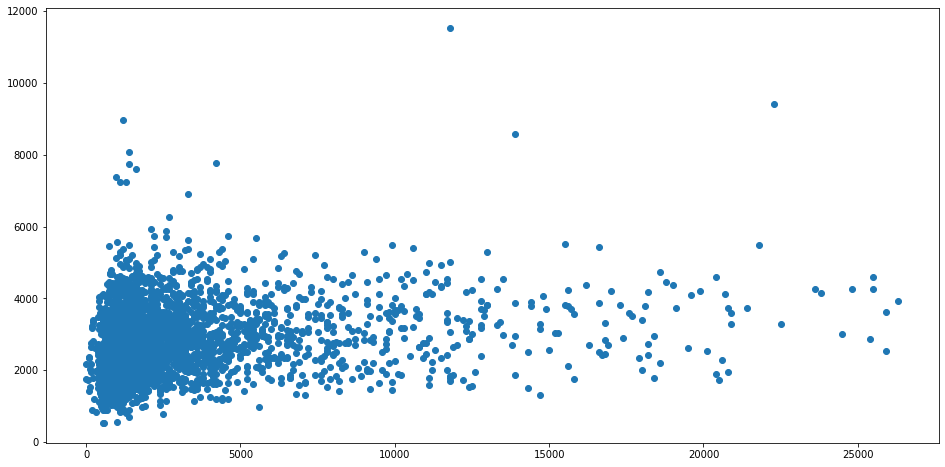

In [19]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [20]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)


Średni błąd kwadratu wyuczonego modelu: 9834572.68
Pierwiastek średniego błędu kwadratowego: 3136.01


In [22]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

Variance score: 0.08


In [22]:
#Wizualizacja na wykresie
#plt.scatter(new_X[:, 0], new_X[:, 1],
#            c=target, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('Accent', 10))
#plt.xlabel('component 1component 1')
#plt.ylabel('component 2')
#plt.title('Dimmensionality reduction using SVD')
#plt.colorbar();

In [23]:
#Explained Variance -> SVD for Online news popularity

#pca = PCA().fit(svd_data)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('components')
#plt.ylabel('Explained variance');

In [ ]:
#SVD redukcja wymiarowości i/lub sieć neuronowa

#Zrobić porównanie:
#1. Czysta regresja liniowa z usunięciem wartości odstających - Zrobione
#2. Regresja liniowa z usuniętymi wartościami odstającymi z zastosowaniem SVD redukcji wymiarowości - DO ZROBIENIA
#3. Czysty model sieci neuronowej z usuniętymi wartościami odstającymi - DO ZROBIENIA
#4. Model sieci neuronowej z usunięciem wartości odstających z zastosowaniem SVD redukcji wymiarowości - DO ZROBIENIA

# Porównać wyniki w każdym przypadku -> Sprawdzić który uczy się najlepiej.
# W każdym z czterech przypadków - utworzyć porównanie średniego błędu kwadratowego i pierwiastka,
# a także wynik r2_score (Variance Score).

# Protipy od prowadzącego:
# 1. Jeśli okaże się, że w każdym z 4 przypadków wynik variance score jest bardzo niski to nic się nie dzieję. 
#    Wtedy po prostu należy wykazać i porównać jak wyniki zmieniały się w każdym przypadku.
# 2. Dobrą ocenę można zdobyć nawet jeśli wynik variance score jest niski, pod warunkiem że każdy model ładnie się opiszę.
#    Opis powinien zawierać, dlaczego zdecydowaliśmy się na zastosowanie kolejnego modelu oraz czy 
#    nowy model lepiej/gorzej się uczy.
#    Czyli np. regresja liniowa ma fatalny wynik, więc spróbujemy zastosować do niej redukcje wymiarowości w celu 
#    ulepszenia modelu. Itd itp z każdym kolejnym modelem.
# 3. Jeśli średni błąd kwadratu jest bardzo wysoki (kilka milionów) to wcale nie oznacza, że model jest 
#    niepoprawny/źle wyuczony. Z kolei model jest źle wyuczony gdy wynik R2_Score jest niski.
# 4. Aby można było powiedzieć, że model jest wyuczony poprawnie, jego minimalny wynik R2_Score powinien wynosić 60-70%
#    co prawdopodobnie jest nieosiągalne na podstawie tych danych -> Lecz to się okaże :D

